In [153]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

# 0. MNIST data

In [154]:
from tensorflow import keras

### a) Use help() to load data correctly

In [155]:
help(keras.datasets.mnist.load_data)

Help on function load_data in module keras.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
    
    Args:
      path: path where to cache the dataset locally
        (relative to `~/.keras/datasets`).
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.
    
    **x_test**: uint8 NumPy array of grayscale image data with shapes
      (10000, 28, 28), containing the test data. Pixel values range
      from 0 to 255.
    
  

### b) Import data and check shapes

In [156]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### c) Number of images i X_train

In [157]:
print(f'Number of images in X_train is {len(X_train)}')

Number of images in X_train is 60000


### d) min and max of a sample image

In [158]:
# values in features denote pixel intensity from black (0) to white (255)
X_train[5].min(), X_train[5].max()

(0, 255)

In [159]:
# labels are digits 0-9
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


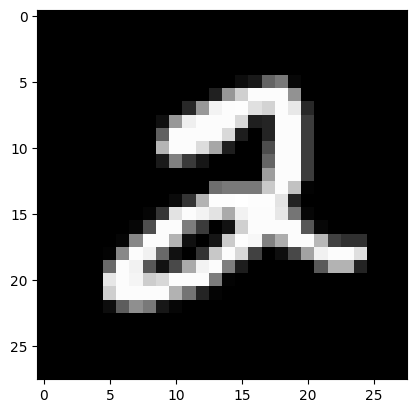

In [160]:
# plotting a randomly chosen sample
plt.imshow(X_train[5], cmap='gray');

### e) plot 20 sample images

AttributeError: 'numpy.ndarray' object has no attribute 'imshow'

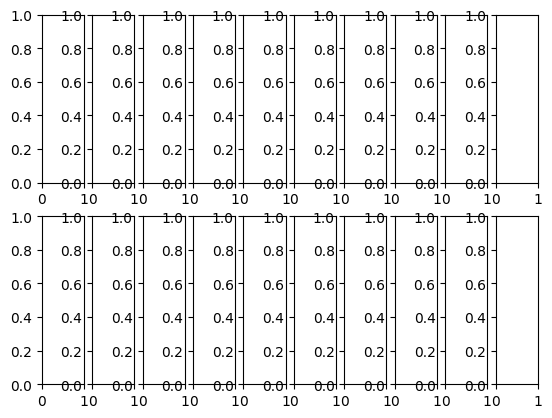

In [161]:
fig, ax = plt.subplots(2, 10)

for i, axes in enumerate(ax.flatten()):
    ax.imshow(X_train[i], cmap='gray', ax=axes);

### f) reshape 3D arrays to 2D arrays

In [162]:
X_train_2D = X_train.reshape(60000, -1)
X_train_2D.shape

(60000, 784)

In [163]:
X_test_2D = X_test.reshape(10000, -1)
X_test_2D.shape

(10000, 784)

# 1. Train|test|val split

In [164]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.16, random_state=42)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((50400, 28, 28), (9600, 28, 28), (10000, 28, 28), (50400,), (9600,), (10000,))

In [168]:
# rashaping X data to 2D
X_train_2D = X_train.reshape(len(X_train), -1)
X_val_2D = X_val.reshape(len(X_val), -1)
X_test_2D = X_test.reshape(len(X_test), -1)

X_train_2D.shape, X_val_2D.shape, X_test_2D.shape

((50400, 784), (9600, 784), (10000, 784))

# 2. Hyperparameter tuning of k

In [173]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# scaling all X data
scaler = MinMaxScaler()
scaled_X_train_2D = scaler.fit_transform(X_train_2D)
scaled_X_val_2D = scaler.transform(X_val_2D)
scaled_X_test_2D = scaler.transform(X_test_2D)

# looping to find best k-value
accuracy_score_list = []
for k in range (1,10):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_X_train_2D, y_train)
    y_pred = model.predict(scaled_X_val_2D)
    accuracy_score_list.append(accuracy_score(y_val, y_pred))


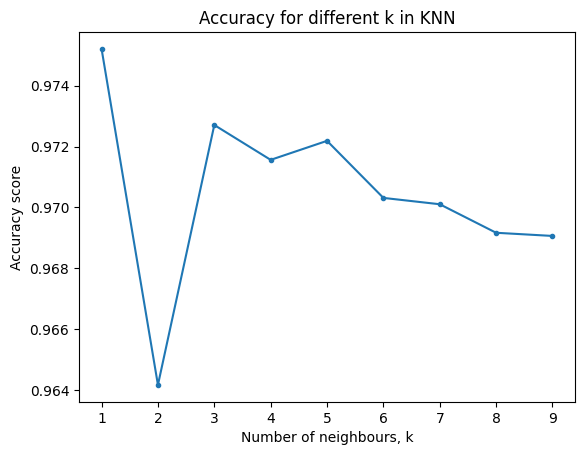

In [180]:
# visualizing
fig, ax = plt.figure(), plt.axes()
ax.plot(range(1,10), accuracy_score_list, '.-');
ax.set(title="Accuracy for different k in KNN", xlabel = "Number of neighbours, k", ylabel= "Accuracy score");

# k = 1 optimal???


# 3. Train and predict